<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/check_credit_staus_fullypaid_chargedoff_real_praxis_feature_engineering_heavy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real project predicting binary outcome, heavy feature engineering with dropout to overcome model overfitting problem
Feature Engineering: Dealing with non numeric data types and nulls

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Download first csv which contains column names with description

In [3]:
data_info = pd.read_csv('./lending_club_info.csv',index_col='LoanStatNew')
#index_col : int or sequence, default 0
#defines which Column to use for index.

In [4]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [5]:
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


Define a function, that is handy to read description of any column

In [6]:
def feature_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [7]:
feature_info('grade')

LC assigned loan grade


Download second csv containing the column data

In [8]:
df = pd.read_csv('./lending_club_loan_two.csv')

In [9]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166849 entries, 0 to 166848
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             166849 non-null  float64
 1   term                  166849 non-null  object 
 2   int_rate              166849 non-null  float64
 3   installment           166849 non-null  float64
 4   grade                 166849 non-null  object 
 5   sub_grade             166849 non-null  object 
 6   emp_title             157185 non-null  object 
 7   emp_length            159085 non-null  object 
 8   home_ownership        166849 non-null  object 
 9   annual_inc            166849 non-null  float64
 10  verification_status   166849 non-null  object 
 11  issue_d               166849 non-null  object 
 12  loan_status           166849 non-null  object 
 13  purpose               166849 non-null  object 
 14  title                 166108 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

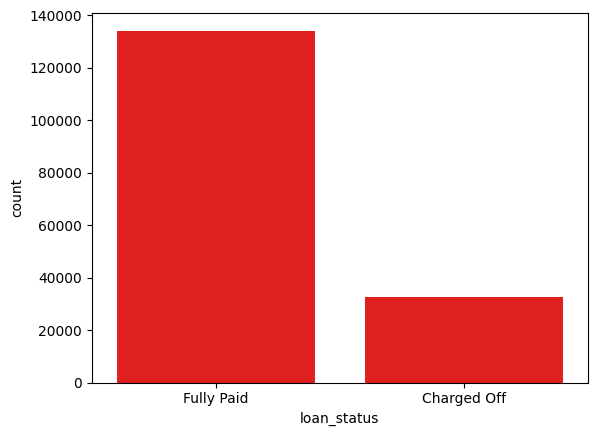

In [11]:
sns.countplot(x=df['loan_status'], color='r')

Make loan_status as numeric feature so that we can use it to check its correlation with other features

<ipython-input-12-df002da5e9a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

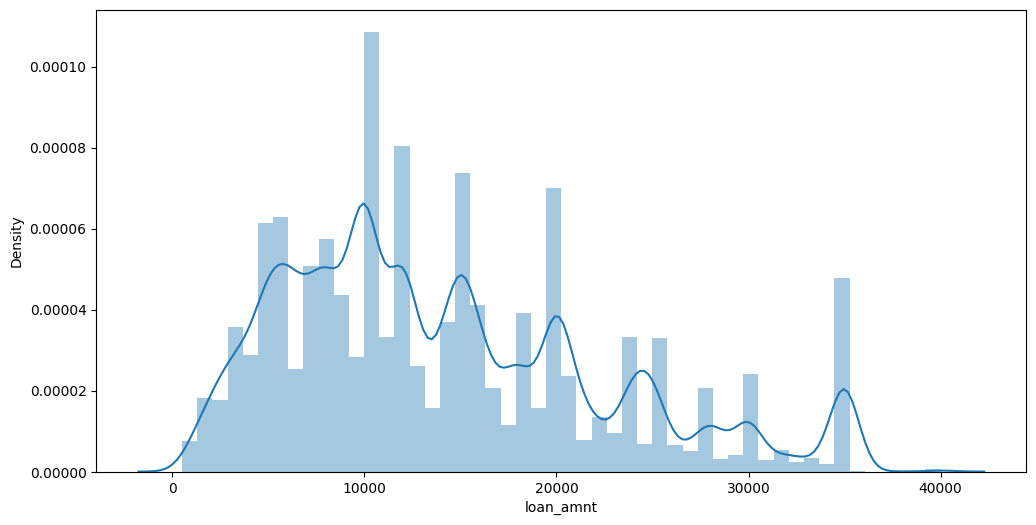

In [12]:
# Next let us check how loan_amount is distributed
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'])

<Axes: xlabel='loan_amnt', ylabel='installment'>

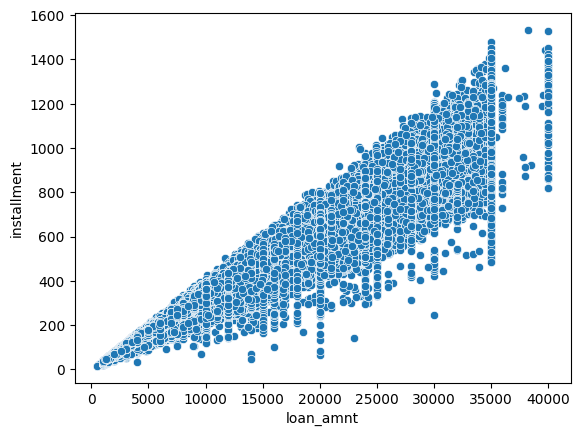

In [13]:
# Next let us check if loan_amount increases do installments increases
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<Axes: xlabel='loan_status', ylabel='int_rate'>

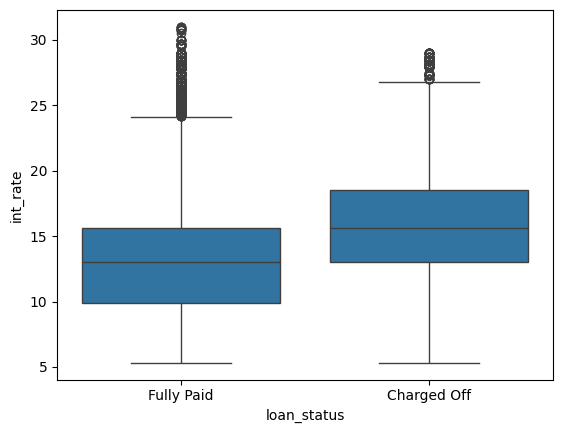

In [14]:
# As we see interest rate is highly coorelated with loan status so lets see
sns.boxplot(x='loan_status',y='int_rate',data=df)
# indeed, interest_rate has an impact on loan_status, ppl with lower interest rate have paid compared to ppl with higher interest rate

In [15]:
feature_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [16]:
print(feature_info('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
None


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

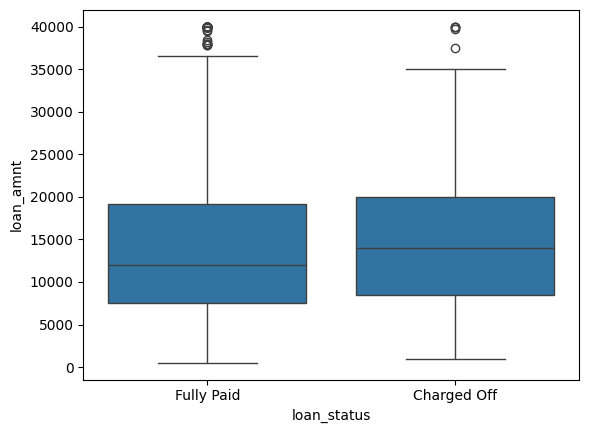

In [17]:
# Let us see if loan_amnt plays a role in determining loan_status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# doesnt look like loan was fullypaid if loan amount was low or high, it has no significant impact

AUFGABE: Berechne die zusammengefassten Statistiken für die Höhe des Kredites, gruppiert nach loan_status.

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,32602.0,15100.486166,8484.567167,1000.0,8500.0,14000.0,20000.0,40000.0
Fully Paid,134247.0,13854.071413,8309.955267,500.0,7500.0,12000.0,19200.0,40000.0


# Part 2: Data Preprocessing
Now let us focus on feature engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166849 entries, 0 to 166848
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             166849 non-null  float64
 1   term                  166849 non-null  object 
 2   int_rate              166849 non-null  float64
 3   installment           166849 non-null  float64
 4   grade                 166849 non-null  object 
 5   sub_grade             166849 non-null  object 
 6   emp_title             157185 non-null  object 
 7   emp_length            159085 non-null  object 
 8   home_ownership        166849 non-null  object 
 9   annual_inc            166849 non-null  float64
 10  verification_status   166849 non-null  object 
 11  issue_d               166849 non-null  object 
 12  loan_status           166849 non-null  object 
 13  purpose               166849 non-null  object 
 14  title                 166108 non-null  object 
 15  

In [20]:
# Let us dig into object data types

<Axes: xlabel='grade', ylabel='count'>

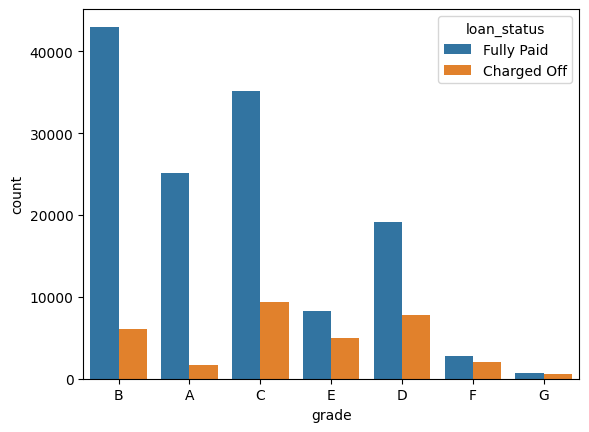

In [21]:
sns.countplot(x=df['grade'].sort_values(),hue=df['loan_status'])
# it looks like the class F and G has not paid off loan often

<Axes: xlabel='sub_grade', ylabel='count'>

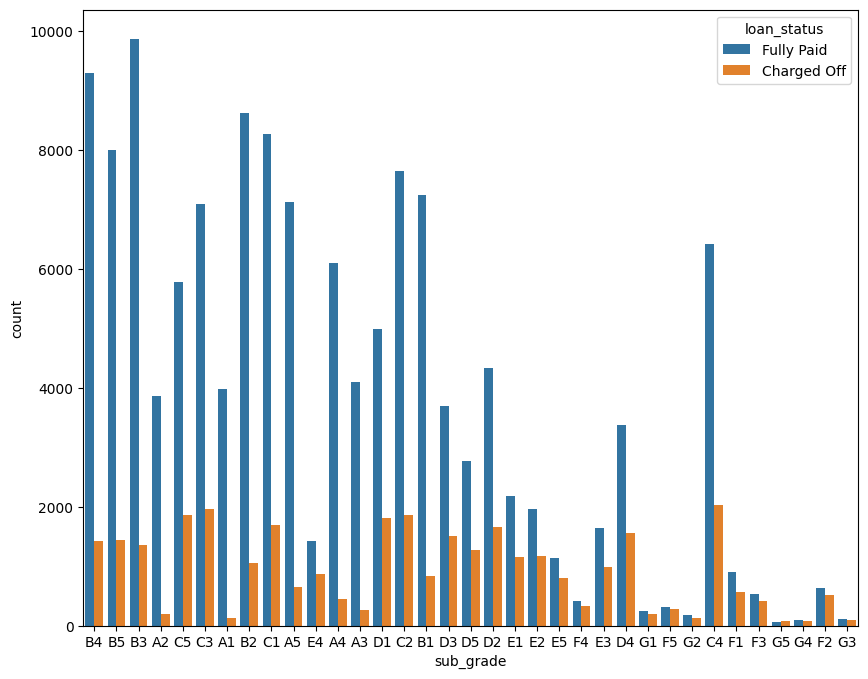

In [22]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['sub_grade'].sort_values(),hue=df['loan_status'])

Grade is incorporated in subgrade in great detail, so let us remove grade and convert subgrade using one hot encoding

In [23]:
df.drop('grade',axis=1,inplace=True)

In [24]:
# one hot encoding
sub_grade = pd.get_dummies(df['sub_grade' ], drop_first=True)

In [25]:
df = pd.concat([df, sub_grade], axis=1)

In [26]:
df.drop('sub_grade',axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166849 entries, 0 to 166848
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             166849 non-null  float64
 1   term                  166849 non-null  object 
 2   int_rate              166849 non-null  float64
 3   installment           166849 non-null  float64
 4   emp_title             157185 non-null  object 
 5   emp_length            159085 non-null  object 
 6   home_ownership        166849 non-null  object 
 7   annual_inc            166849 non-null  float64
 8   verification_status   166849 non-null  object 
 9   issue_d               166849 non-null  object 
 10  loan_status           166849 non-null  object 
 11  purpose               166849 non-null  object 
 12  title                 166108 non-null  object 
 13  dti                   166849 non-null  float64
 14  earliest_cr_line      166849 non-null  object 
 15  

# Deal with null values and other object types

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_title                9664
emp_length               7764
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     741
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                110
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                15909
pub_rec_bankruptcies      231
address                     1
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5        

In [29]:
  df['emp_title'].value_counts()
  # Looks like there are too many titles and we cannot fill it for null values + we assume they dont play a role in determining loan status we drop it

Teacher                             1867
Manager                             1827
Registered Nurse                     813
RN                                   768
Supervisor                           767
                                    ... 
ASSISTANT BILLER/PAYROLL               1
ICG                                    1
Trinity River Authority of Texas       1
Senior Manager, III                    1
Ballers Bailbonds                      1
Name: emp_title, Length: 82927, dtype: int64

In [30]:
df.drop('emp_title',axis=1, inplace=True)

<Axes: xlabel='emp_length', ylabel='count'>

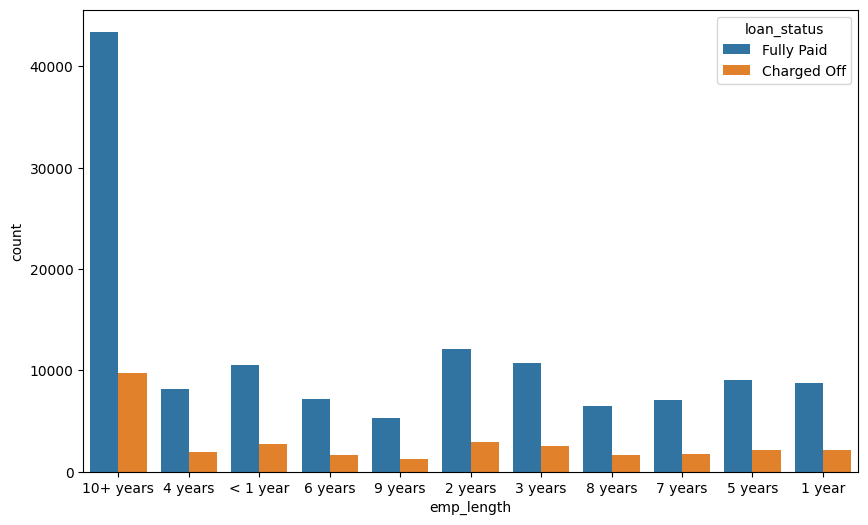

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

CHALLENGE: This still gives us insufficient information as to whether there is a strong relationship between length of employment and repayment, we need the percentage of repayment per category. This means we know what percentage of borrowers per job category have not repaid their loan. There are a variety of ways to create this series. After you have created it, display it as a barplot. This might be difficult, take a look at the solution notebook for problems with creating the series.

In [32]:
#(df.groupby('emp_length')['loan_repaid'].count()) / len(df[df['loan_repaid']==1 ])
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [33]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [34]:
emp_len = emp_co / emp_fp

<Axes: xlabel='emp_length'>

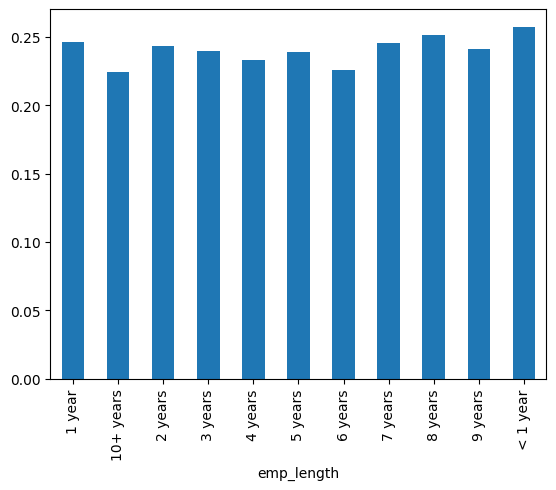

In [35]:
emp_len.plot(kind = 'bar')

Conclusion : The repayment rates across all categories are extremely similar. Discard the emp_length column as it does not bring any value

In [36]:
df.drop('emp_length',axis=1, inplace = True)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     741
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                110
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                15909
pub_rec_bankruptcies      231
address                     1
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5                          0
C1                          0
C2        

Let us now check the columns title and purpose

In [38]:
df['title' ].value_counts()

Debt consolidation          64010
Credit card refinancing     21825
Home improvement             6463
Other                        5446
Debt Consolidation           4943
                            ...  
Final debt consolidation        1
debt cosolidate                 1
Multi-purpose loan              1
Kitchen+Bathroom remodel        1
Next Step                       1
Name: title, Length: 23225, dtype: int64

In [39]:
df['purpose' ].value_counts()

debt_consolidation    98589
credit_card           35195
home_improvement      10189
other                  8909
major_purchase         3770
small_business         2310
car                    1975
medical                1768
moving                 1198
vacation               1028
house                   932
wedding                 756
renewable_energy        136
educational              94
Name: purpose, dtype: int64

Conclusion : Title and purpose are similar, so discard title and we will deal with purpose later

In [40]:
df.drop('title',axis=1,inplace=True)

Let us focus on mort_acc missing values. Let us check which which column is mort_acc highly coorelated

In [41]:
df.corr()['mort_acc'].sort_values(ascending=False)

<ipython-input-41-c591a4eea948>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values(ascending=False)


mort_acc                1.000000
total_acc               0.382307
annual_inc              0.238084
loan_amnt               0.224492
installment             0.195916
revol_bal               0.195751
open_acc                0.113147
A3                      0.038515
A5                      0.035694
A2                      0.035079
A4                      0.027312
pub_rec_bankruptcies    0.026577
B1                      0.021724
B2                      0.015516
pub_rec                 0.013497
revol_util              0.010386
G1                      0.000797
G3                      0.000180
B3                     -0.000351
F1                     -0.000537
G4                     -0.001509
B4                     -0.002225
C5                     -0.003440
F5                     -0.003599
G2                     -0.003729
F2                     -0.004401
G5                     -0.004505
E1                     -0.005264
F4                     -0.005951
F3                     -0.006602
E4        

In [42]:
df[['total_acc','mort_acc']]

,total_acc,mort_acc
0,25.0,0.0
1,27.0,3.0
2,26.0,0.0
3,13.0,0.0
4,43.0,1.0
...,...,...
166844,37.0,2.0
166845,47.0,0.0
166846,31.0,3.0
166847,16.0,0.0


HERAUSFORDERUNG: Lasst uns die fehlenden Werte von mort_acc basierend auf deren total_acc-Werten ersetzen. Wenn mort_acc fehlt, ersetzen wir den fehlenden Wert mit dem Durchschnitt entsprechend des total_acc-Wertes aus der oben erzeugten Series. Dies beinhaltet die Anwendung der .apply()-Methode mit zwei Spalten. Beachte den folgenden Link für mehr Informationen, oder wirf einen Blick in das Video/Lösungsnotebook.

In [43]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

Mean of mort_acc column per total_acc


In [44]:
total_acc_avg[19.0]

1.369478672985782

In [45]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [46]:
#df['mort_acc' ] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc' ]),axis=1 )
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [47]:
df.isnull().sum() / len(df)* 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.065928
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.138449
address                 0.000599
A2                      0.000000
A3                      0.000000
A4                      0.000000
A5                      0.000000
B1                      0.000000
B2                      0.000000
B3                      0.000000
B4                      0.000000
B5        

revol_util              0.069692
pub_rec_bankruptcies    0.135091
The above two cols have null values but they are so less in perc we can just drop the null value rows

In [48]:
df = df.dropna()

# Kategorische Variablen und Dummyvariablen

In [49]:
df['home_ownership'].value_counts()

MORTGAGE    83556
RENT        67094
OWN         15801
OTHER          42
NONE           12
ANY             2
Name: home_ownership, dtype: int64

AUFGABE: Konvertiere diese Dummyvariablen, aber ersetze NONE und ANY mit OTHER, so dass wir nur 4 Kategorien erhalten, MORTGAGE, RENT, OWN, OTHER. Füge sie dann dem originalen DataFrame hinzu. Verwende drop_first=True und verwirf die ursprünglichen Spalten.

In [50]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x =='ANY' else x )

<ipython-input-50-c496f270282c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x =='ANY' else x )


In [51]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x )

In [52]:
df['home_ownership'].value_counts()

MORTGAGE    83556
RENT        67094
OWN         15801
OTHER          56
Name: home_ownership, dtype: int64

In [53]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [54]:
df = pd.concat([ df,home_ownership ],axis=1)

In [55]:
# convert term into int by extracting first 2 digits 36 or 60
df['term'] = df['term'].apply(lambda s: int(s[:3]))


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166507 entries, 0 to 166847
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             166507 non-null  float64
 1   term                  166507 non-null  int64  
 2   int_rate              166507 non-null  float64
 3   installment           166507 non-null  float64
 4   home_ownership        166507 non-null  object 
 5   annual_inc            166507 non-null  float64
 6   verification_status   166507 non-null  object 
 7   issue_d               166507 non-null  object 
 8   loan_status           166507 non-null  object 
 9   purpose               166507 non-null  object 
 10  dti                   166507 non-null  float64
 11  earliest_cr_line      166507 non-null  object 
 12  open_acc              166507 non-null  float64
 13  pub_rec               166507 non-null  float64
 14  revol_bal             166507 non-null  float64
 15  

In [57]:
df.drop('home_ownership',axis=1,inplace=True)

AUFGABE: Konvertiere die Spalten ['verification_status', 'application_type','initial_list_status','purpose'] in Dummyvariablen und füge sie dem originalen DataFrame hinzu. Setze drop_first=True und verwirf die ursprünglichen Spalten.

In [58]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [59]:
df = pd.concat([df,dummies],axis=1)


In [60]:
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [61]:
df['issue_d'].value_counts()

Oct-2014    6195
Jul-2014    5395
Jan-2015    4893
Dec-2013    4558
Nov-2013    4428
            ... 
Dec-2007       2
Feb-2008       2
Oct-2007       1
Jan-2008       1
Nov-2007       1
Name: issue_d, Length: 111, dtype: int64

TASK: This would be a data overflow because using our model we don't know in advance whether a loan will be given or not. So theoretically we wouldn't have an issue_date. Delete this column.


In [62]:
df.drop('issue_d',axis=1,inplace=True)

extract zipcode from address and covert it into dummy variables

In [63]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [64]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)

In [65]:
df=pd.concat([df,zip_code],axis=1)

In [66]:
df.drop(['zip_code','address'],axis=1,inplace=True)

In [67]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
166843    Apr-1988
166844    Nov-2002
166845    Mar-2004
166846    Sep-2004
166847    Jun-2000
Name: earliest_cr_line, Length: 166507, dtype: object

In [68]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


TASK: This appears to be a historical timestamp feature. Extract the year of this feature using the .apply() function and convert it to a numeric feature. Write this data into a feature column 'earliest_cr_year' and then discard the feature earliest_cr_line.

In [69]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [70]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x : int(x.year))

In [71]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [72]:
# convert loan_status in numeric
df['loan_repaid' ] = df['loan_status'].apply(lambda x : 0 if x=="Fully Paid" else 1)
#'Fully Paid':1,'Charged Off':0

In [73]:
# drop loan_status as we have created numeric col loan_repaid
df.drop('loan_status',axis=1,inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166507 entries, 0 to 166847
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            166507 non-null  float64
 1   term                                 166507 non-null  int64  
 2   int_rate                             166507 non-null  float64
 3   installment                          166507 non-null  float64
 4   annual_inc                           166507 non-null  float64
 5   dti                                  166507 non-null  float64
 6   open_acc                             166507 non-null  float64
 7   pub_rec                              166507 non-null  float64
 8   revol_bal                            166507 non-null  float64
 9   revol_util                           166507 non-null  float64
 10  total_acc                            166507 non-null  float64
 11  mort_acc     

# Train Test split
OPTIONAL: Verwende .sample() um eine Stichprobe der 490k+ Einträge zu extrahieren zur Reduktion der Trainingszeit. Schwer zu empfehlen für Rechner mit wenig RAM oder für das Training ohne GPU.

In [75]:
df = df.sample(frac=0.1,random_state=101)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

Normalise the data using MinmaxScaler

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [84]:
X_train.shape , y_train.shape

((13320, 78), (13320,))

In [85]:
model = Sequential()
# input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid')) # as we are dealing with binary problem so sigmoid
model.compile(optimizer ='adam',loss='binary_crossentropy')

In [86]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
53/53 [==============================] - 2s 12ms/step - loss: 0.5361 - val_loss: 0.4425
Epoch 2/25
53/53 [==============================] - 0s 7ms/step - loss: 0.4191 - val_loss: 0.3604
Epoch 3/25
53/53 [==============================] - 0s 7ms/step - loss: 0.3594 - val_loss: 0.3114
Epoch 4/25
53/53 [==============================] - 0s 6ms/step - loss: 0.3237 - val_loss: 0.2877
Epoch 5/25
53/53 [==============================] - 0s 7ms/step - loss: 0.3032 - val_loss: 0.2769
Epoch 6/25
53/53 [==============================] - 0s 7ms/step - loss: 0.2933 - val_loss: 0.2719
Epoch 7/25
53/53 [==============================] - 0s 7ms/step - loss: 0.2811 - val_loss: 0.2686
Epoch 8/25
53/53 [==============================] - 0s 8ms/step - loss: 0.2782 - val_loss: 0.2701
Epoch 9/25
53/53 [==============================] - 0s 7ms/step - loss: 0.2750 - val_loss: 0.2655
Epoch 10/25
53/53 [==============================] - 0s 6ms/step - loss: 0.2711 - val_loss: 0.2655
Epoch 11/25
53/53 

In [87]:
losses = pd.DataFrame(model.history.history)

<Axes: >

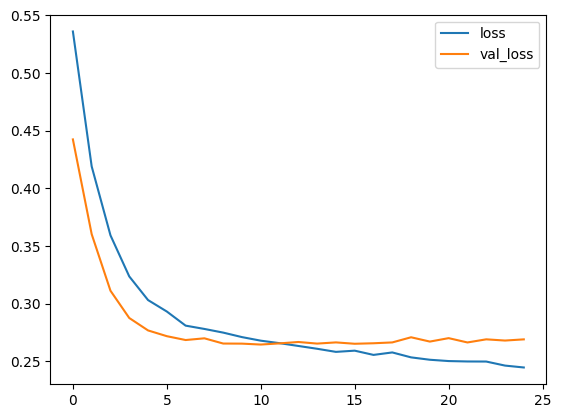

In [88]:
losses[['loss','val_loss']].plot()

Save Model and predict for new customer if you give credit or not

In [89]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')

# Abschnitt 3: Evaluation der Leistung des Modells

**AUFGABE: Plotte den loss der Validierung gegen den loss des Trainings.**

In [96]:
predictions = (model.predict(X_test)>0.5).astype('int32')

105/105 [==============================] - 0s 3ms/step


In [97]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
print(confusion_matrix(y_test,predictions))

[[2643   38]
 [ 333  317]]


In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2681
           1       0.89      0.49      0.63       650

    accuracy                           0.89      3331
   macro avg       0.89      0.74      0.78      3331
weighted avg       0.89      0.89      0.88      3331



**AUFGABE: Würdest du dem folgenden Kunden einen Kredit anbieten?**

In [111]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           20000.00
term                   60.00
int_rate               15.61
installment           482.23
annual_inc          55000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   1.00
93700                   0.00
earliest_cr_year     1979.00
Name: 17064, Length: 78, dtype: float64

In [112]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [113]:
(model.predict(new_customer)>0.5).astype('int32')

1/1 [==============================] - 0s 23ms/step


array([[1]], dtype=int32)

In [114]:
df.iloc[random_ind]['loan_repaid']

1.0

Perfectly done.

In [ ]:
data_info.columns